## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt ## max speed median,EConsumption Rating 5,warranty median,price cca,type cca
import numpy as np

## Import Data

In [220]:
df = pd.read_csv("flipkart_washing_machine.csv")
df.head()

,Unnamed: 0,Informations,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage
0,0,realme TechLife 7 kg 5 Star rating Semi Automa...,1450 rpm Max Speed,5 Star Rating,2 Years Comprehensive Warranty on Product,"₹9,200",48% off
1,1,FOXSKY 8 kg Semi Automatic Top Load Washing Ma...,700 rpm Max Speed,5 Star Rating,2 Years Comprehensive Warranty on Product and ...,"₹12,190",45% off
2,2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,740 rpm Max Speed,5 Star Rating,2 Years Warranty on Product and 5 Years Warran...,"₹7,690",45% off
3,3,MarQ by Flipkart 6 kg 5 Star Rating Innowash R...,1350 rpm Max Speed,5 Star Rating,2 Years Comprehensive Warranty on Product and ...,"₹6,490",20% off
4,4,"SAMSUNG 7 kg 5 star, Ecobubble, Digital Invert...",1350 rpm Max Speed,5 Star Rating,2 Years Warranty on Product and 5 Years Warran...,"₹17,990",40% off


## Check Null Values

In [221]:
df.isnull().mean()*100

Unnamed: 0                      0.000000
Informations                   12.573443
Max_Speed                      38.425382
Electric_Consumption_Rating    19.388954
Warranty                       33.019976
Prices                         12.808461
Discount_Percentage             0.000000
dtype: float64

## Rename Unnamed Column to S.No

In [222]:
df=df.rename(columns={"Unnamed: 0":"S.No"})

## Set_Index As S.No

In [223]:
df.set_index("S.No",inplace=True)

In [224]:
df.head()

,Informations,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage
S.No,,,,,,
0,realme TechLife 7 kg 5 Star rating Semi Automa...,1450 rpm Max Speed,5 Star Rating,2 Years Comprehensive Warranty on Product,"₹9,200",48% off
1,FOXSKY 8 kg Semi Automatic Top Load Washing Ma...,700 rpm Max Speed,5 Star Rating,2 Years Comprehensive Warranty on Product and ...,"₹12,190",45% off
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,740 rpm Max Speed,5 Star Rating,2 Years Warranty on Product and 5 Years Warran...,"₹7,690",45% off
3,MarQ by Flipkart 6 kg 5 Star Rating Innowash R...,1350 rpm Max Speed,5 Star Rating,2 Years Comprehensive Warranty on Product and ...,"₹6,490",20% off
4,"SAMSUNG 7 kg 5 star, Ecobubble, Digital Invert...",1350 rpm Max Speed,5 Star Rating,2 Years Warranty on Product and 5 Years Warran...,"₹17,990",40% off


## Drop Informations Column Null Values  Using CCA

In [226]:
df.dropna(subset=["Informations"],inplace=True)

## Extract Only Numerical Values From Max_Speed Column 

In [229]:
df['Max_Speed'] = df['Max_Speed'].str.extract(r'(\d+)')

## Extract Only Numerical Values From Electric_Consumption_Rating

In [230]:
df["Electric_Consumption_Rating"]=df["Electric_Consumption_Rating"].str.extract(r'(\d+)')

## Remove Rupees Sign From Price Column

In [232]:
df["Prices"]=df["Prices"].str[1:]

## Extract Only Numerical Values From Discount% Column

In [233]:
df["Discount_Percentage"]=df["Discount_Percentage"].str.extract(r'(\d+)')

## Extract Only Numrical Value from Warranty Column

In [234]:
df["Warranty"]=df["Warranty"].str[0]

In [235]:
df.head()

,Informations,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage
S.No,,,,,,
0,realme TechLife 7 kg 5 Star rating Semi Automa...,1450,5,2,"9,200",48
1,FOXSKY 8 kg Semi Automatic Top Load Washing Ma...,700,5,2,"12,190",45
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,740,5,2,"7,690",45
3,MarQ by Flipkart 6 kg 5 Star Rating Innowash R...,1350,5,2,"6,490",20
4,"SAMSUNG 7 kg 5 star, Ecobubble, Digital Invert...",1350,5,2,"17,990",40


## Extract Only Capacity From Informations Column

In [236]:
df['Capacity_kg'] = df['Informations'].str.extract(r'(\d+\.\d+|\d+)\s*kg')

In [237]:
df.head()

,Informations,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage,Capacity_kg
S.No,,,,,,,
0,realme TechLife 7 kg 5 Star rating Semi Automa...,1450,5,2,"9,200",48,7
1,FOXSKY 8 kg Semi Automatic Top Load Washing Ma...,700,5,2,"12,190",45,8
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,740,5,2,"7,690",45,7.5
3,MarQ by Flipkart 6 kg 5 Star Rating Innowash R...,1350,5,2,"6,490",20,6
4,"SAMSUNG 7 kg 5 star, Ecobubble, Digital Invert...",1350,5,2,"17,990",40,7


## Extract Only Type From Informations Column

In [238]:
df['Type'] = df['Informations'].str.extract(r'(Semi Automatic|Fully Automatic)', expand=False)


In [239]:
df.head()

,Informations,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage,Capacity_kg,Type
S.No,,,,,,,,
0,realme TechLife 7 kg 5 Star rating Semi Automa...,1450,5,2,"9,200",48,7,Semi Automatic
1,FOXSKY 8 kg Semi Automatic Top Load Washing Ma...,700,5,2,"12,190",45,8,Semi Automatic
2,realme TechLife 7.5 kg 5 Star Rating Semi Auto...,740,5,2,"7,690",45,7.5,Semi Automatic
3,MarQ by Flipkart 6 kg 5 Star Rating Innowash R...,1350,5,2,"6,490",20,6,Semi Automatic
4,"SAMSUNG 7 kg 5 star, Ecobubble, Digital Invert...",1350,5,2,"17,990",40,7,Fully Automatic


## Extract Only Product Company Name

In [240]:
def extract(name):
    name=name.split()[0]
    return name.strip()

In [241]:
df["Informations"]=df["Informations"].apply(extract)

In [242]:
df.head()

,Informations,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage,Capacity_kg,Type
S.No,,,,,,,,
0,realme,1450,5,2,"9,200",48,7,Semi Automatic
1,FOXSKY,700,5,2,"12,190",45,8,Semi Automatic
2,realme,740,5,2,"7,690",45,7.5,Semi Automatic
3,MarQ,1350,5,2,"6,490",20,6,Semi Automatic
4,SAMSUNG,1350,5,2,"17,990",40,7,Fully Automatic


## Rename Column Informations To Company

In [243]:
df=df.rename(columns={"Informations":"Company"})

In [244]:
df.head()

,Company,Max_Speed,Electric_Consumption_Rating,Warranty,Prices,Discount_Percentage,Capacity_kg,Type
S.No,,,,,,,,
0,realme,1450,5,2,"9,200",48,7,Semi Automatic
1,FOXSKY,700,5,2,"12,190",45,8,Semi Automatic
2,realme,740,5,2,"7,690",45,7.5,Semi Automatic
3,MarQ,1350,5,2,"6,490",20,6,Semi Automatic
4,SAMSUNG,1350,5,2,"17,990",40,7,Fully Automatic


## Rename Columns

In [245]:
df=df.rename(columns={"Max_Speed":"Max Speed"})

In [246]:
df=df.rename(columns={"Electric_Consumption_Rating":"EConsumption Rating"})

In [247]:
df=df.rename(columns={"Prices":"Price"})

In [248]:
df=df.rename(columns={"Discount_Percentage":"Discount"})

In [249]:
df=df.rename(columns={"Capacity_kg":"Capacity Kg"})

In [250]:
df.head()

,Company,Max Speed,EConsumption Rating,Warranty,Price,Discount,Capacity Kg,Type
S.No,,,,,,,,
0,realme,1450,5,2,"9,200",48,7,Semi Automatic
1,FOXSKY,700,5,2,"12,190",45,8,Semi Automatic
2,realme,740,5,2,"7,690",45,7.5,Semi Automatic
3,MarQ,1350,5,2,"6,490",20,6,Semi Automatic
4,SAMSUNG,1350,5,2,"17,990",40,7,Fully Automatic


## Change The Columns Type To Their Actual Type

In [253]:
df["Max Speed"]=pd.to_numeric(df["Max Speed"],errors="coerce")

In [254]:
df["EConsumption Rating"]=pd.to_numeric(df["EConsumption Rating"],errors="coerce")

In [255]:
df["Warranty"]=pd.to_numeric(df["Warranty"],errors="coerce")

In [256]:
df["Price"]=df["Price"].str.replace(",","")

In [258]:
df["Price"]=pd.to_numeric(df["Price"],errors="coerce")

In [259]:
df["Discount"]=pd.to_numeric(df["Discount"],errors="coerce")

In [260]:
df["Capacity Kg"]=pd.to_numeric(df["Capacity Kg"],errors="coerce")

In [261]:
df.head()

,Company,Max Speed,EConsumption Rating,Warranty,Price,Discount,Capacity Kg,Type
S.No,,,,,,,,
0,realme,1450.0,5.0,2.0,9200.0,48,7.0,Semi Automatic
1,FOXSKY,700.0,5.0,2.0,12190.0,45,8.0,Semi Automatic
2,realme,740.0,5.0,2.0,7690.0,45,7.5,Semi Automatic
3,MarQ,1350.0,5.0,2.0,6490.0,20,6.0,Semi Automatic
4,SAMSUNG,1350.0,5.0,2.0,17990.0,40,7.0,Fully Automatic


## Dealing With Null Values

## Make A copy of Original Data As df2

In [263]:
df2 = df.copy()

In [265]:
df["Max Speed"].median()

1300.0

## Replace Max Speed Null Values Into Mean Value of Max Speed

In [270]:
df2['maxspeedmean'] = df2['Max Speed'].fillna(df2['Max Speed'].mean())

In [271]:
df2.head()

,Company,Max Speed,EConsumption Rating,Warranty,Price,Discount,Capacity Kg,Type,maxspeedmean
S.No,,,,,,,,,
0,realme,1450.0,5.0,2.0,9200.0,48,7.0,Semi Automatic,1450.0
1,FOXSKY,700.0,5.0,2.0,12190.0,45,8.0,Semi Automatic,700.0
2,realme,740.0,5.0,2.0,7690.0,45,7.5,Semi Automatic,740.0
3,MarQ,1350.0,5.0,2.0,6490.0,20,6.0,Semi Automatic,1350.0
4,SAMSUNG,1350.0,5.0,2.0,17990.0,40,7.0,Fully Automatic,1350.0


## Check The distribution Of Max Speed After Replacing  Null Value With Mean

<Axes: xlabel='Max Speed', ylabel='Density'>

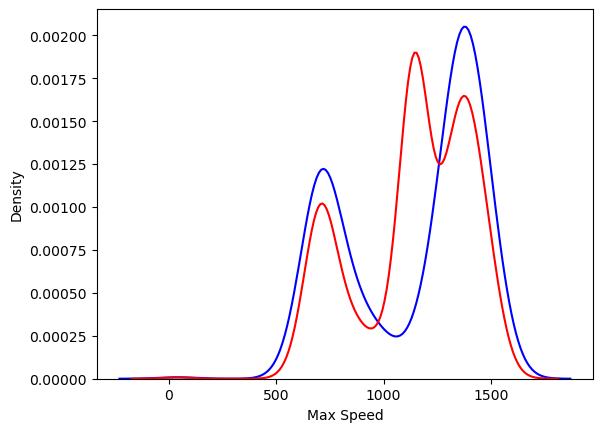

In [275]:
sns.kdeplot(df2["Max Speed"],color="blue")
sns.kdeplot(df2["maxspeedmean"],color="red")

## Replace Max Speed Null Values With Max Speed median value

In [277]:
df2["maxspeedmedian"] = df2["Max Speed"].fillna(df2["Max Speed"].median())

## Check The distribution After Replacing The Max Speed Null Value With Median

<Axes: xlabel='Max Speed', ylabel='Density'>

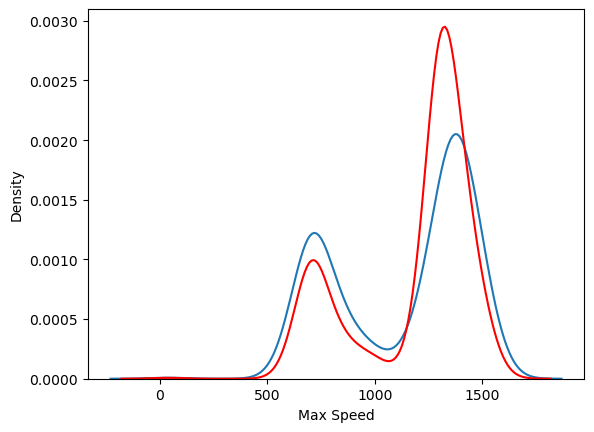

In [279]:
sns.kdeplot(df2["Max Speed"])
sns.kdeplot(df2["maxspeedmedian"],color="red")

## Compare The Variance Of MeanNullValue MedianNullValue To The Original MaxSpeed Column

In [291]:
df2["maxspeedmean"].var()

68942.08216124034

In [292]:
df2["Max Speed"].var()

97942.57561338716

In [295]:
df2["maxspeedmedian"].var()

74318.24876626254

## Replace NullValues Of EConsumption Rating With Mode

In [300]:
df2["new_econr"]=df2["EConsumption Rating"].fillna(5)

In [301]:
df2

,Company,Max Speed,EConsumption Rating,Warranty,Price,Discount,Capacity Kg,Type,maxspeedmean,maxspeedmedian,maxspeedmode,new_econr
S.No,,,,,,,,,,,,
0,realme,1450.0,5.0,2.0,9200.0,48,7.0,Semi Automatic,1450.000000,1450.0,1450.0,5.0
1,FOXSKY,700.0,5.0,2.0,12190.0,45,8.0,Semi Automatic,700.000000,700.0,700.0,5.0
2,realme,740.0,5.0,2.0,7690.0,45,7.5,Semi Automatic,740.000000,740.0,740.0,5.0
3,MarQ,1350.0,5.0,2.0,6490.0,20,6.0,Semi Automatic,1350.000000,1350.0,1350.0,5.0
4,SAMSUNG,1350.0,5.0,2.0,17990.0,40,7.0,Fully Automatic,1350.000000,1350.0,1350.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
739,Whirlpool,NaN,NaN,NaN,12190.0,31,8.0,Semi Automatic,1139.438931,1300.0,NaN,5.0
740,FOXSKY,NaN,NaN,NaN,20999.0,38,9.5,Semi Automatic,1139.438931,1300.0,NaN,5.0
741,Voltas,NaN,NaN,NaN,16850.0,12,9.0,Semi Automatic,1139.438931,1300.0,NaN,5.0


## This Is The Distribution After Replace Null Values With Mode

<Axes: xlabel='EConsumption Rating', ylabel='Density'>

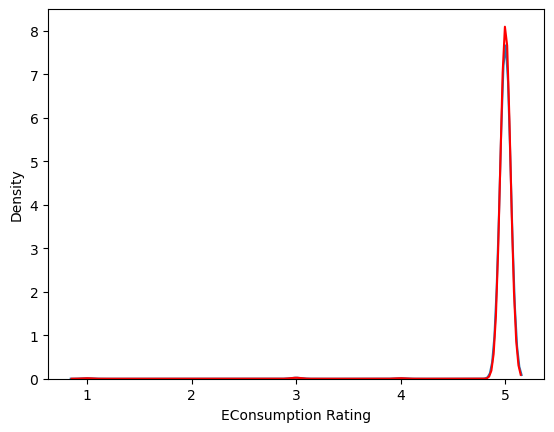

In [303]:
sns.kdeplot(df2["EConsumption Rating"])
sns.kdeplot(df2["new_econr"],color="red")

## Replace The Null Values Of Warranty With Mean

In [307]:
df2["warrantymean"]=df2["Warranty"].fillna(df2["Warranty"].mean())

## Distribution Of Warranty After Replacing Null Value With Mean

<Axes: xlabel='Warranty', ylabel='Density'>

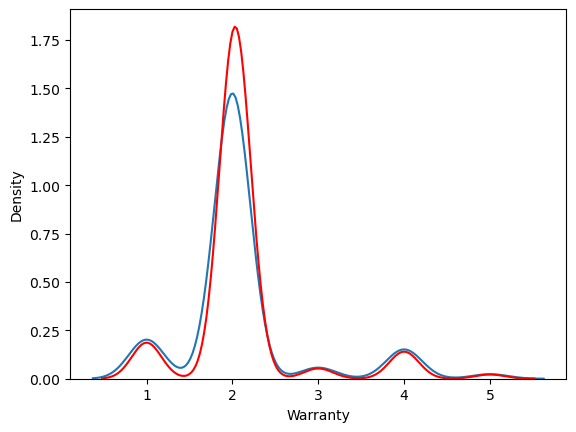

In [309]:
sns.kdeplot(df2["Warranty"])
sns.kdeplot(df2["warrantymean"],color="red")

## Replace The Null Values Of Warranty With Median

In [310]:
df2["warrantymedian"]=df2["Warranty"].fillna(df2["Warranty"].median())

## Distribution Of Warranty After Replacing Null Value With Median

<Axes: xlabel='Warranty', ylabel='Density'>

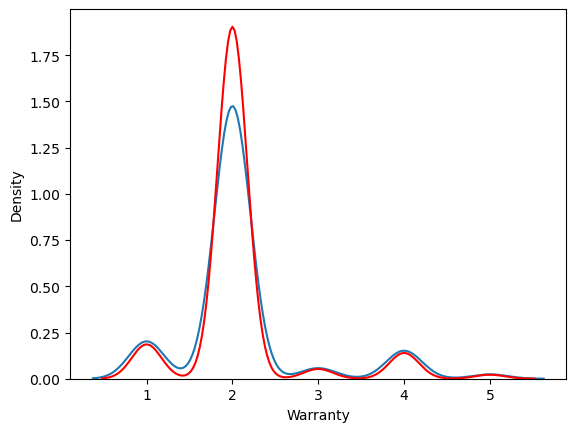

In [313]:
sns.kdeplot(df2["Warranty"])
sns.kdeplot(df2["warrantymedian"],color="red")

## Check The Variance

In [314]:
df2["warrantymedian"].var()

0.4223215965498748

In [316]:
df2["warrantymean"].var()

0.4197103595937182

In [317]:
df2["Warranty"].var()

0.5509625391839799

## Replace Null Values in Original Data After Knowing The Best Value That Replace Null Values

In [352]:
df["Max Speed"]=df["Max Speed"].fillna(df["Max Speed"].median())

In [354]:
df["EConsumption Rating"]=df["EConsumption Rating"].fillna(5)

In [356]:
df["Warranty"]=df["Warranty"].fillna(df["Warranty"].median())

In [357]:
df.dropna(subset=["Price"],inplace=True) # 2 Null Values

In [359]:
df.dropna(subset=["Type"],inplace=True) # 12 Null Values

In [361]:
df.dropna(subset=["Capacity Kg"],inplace=True) # 8 Null Values

## So Finally Their is No Null Values In The Data

In [362]:
df.isnull().sum()

Company                0
Max Speed              0
EConsumption Rating    0
Warranty               0
Price                  0
Discount               0
Capacity Kg            0
Type                   0
dtype: int64

In [363]:
df.head()

,Company,Max Speed,EConsumption Rating,Warranty,Price,Discount,Capacity Kg,Type
S.No,,,,,,,,
0,realme,1450.0,5.0,2.0,9200.0,48,7.0,Semi Automatic
1,FOXSKY,700.0,5.0,2.0,12190.0,45,8.0,Semi Automatic
2,realme,740.0,5.0,2.0,7690.0,45,7.5,Semi Automatic
3,MarQ,1350.0,5.0,2.0,6490.0,20,6.0,Semi Automatic
4,SAMSUNG,1350.0,5.0,2.0,17990.0,40,7.0,Fully Automatic


### Data Info

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 741
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              676 non-null    object 
 1   Max Speed            676 non-null    float64
 2   EConsumption Rating  676 non-null    float64
 3   Warranty             676 non-null    float64
 4   Price                676 non-null    float64
 5   Discount             676 non-null    int64  
 6   Capacity Kg          676 non-null    float64
 7   Type                 676 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 47.5+ KB


## Export The Clean Dataset

In [367]:
df.to_csv("updated_flipkart.csv")

# Thank You!